In [1]:
import librenderman as rm
import numpy as np

In [2]:
waveshell_path = '/Applications/Waves/WaveShells V11/WaveShell6-VST3 11.0.vst3'
#waveshell_path = '/Applications/Waves/WaveShells V11/WaveShell6-AU 11.0.component'


# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

In [3]:
import librosa
data, sr = librosa.load(
    '/Users/shenberg/Documents/work/waves_dubbing_pilot/data/rani_challenge/Frankly/Frankly.wav',
    sr=sampleRate, res_type='kaiser_fast'
)
data.shape, sr

((155232,), 44100)

In [4]:
engine.load_plugin(waveshell_path)

True

In [5]:
engine.get_plugin_parameters_description()

'  0: Bypass:\n  1: Bank:\n  2: NS1:\n'

In [6]:
help(engine.get_plugin_parameters_description)

Help on method get_plugin_parameters_description:

get_plugin_parameters_description(...) method of librenderman.RenderEngine instance
    get_plugin_parameters_description( (RenderEngine)arg1) -> str :
    
        C++ signature :
            std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > get_plugin_parameters_description(wrap::RenderEngineWrapper {lvalue})



In [7]:
engine.get_plugin_parameter_size()

3

In [8]:
generator = rm.PatchGenerator(engine)

In [9]:
#new_patch = generator.get_random_patch()
#new_patch

In [16]:
# list of (parameter index, parameter value) pairs
patch = [(0,0), (1, 0), (2, 1)]
engine.set_patch(patch)

data_normed = data*(2**(-0.5))/np.max(np.abs(data))
# Render the data. 
#engine.render_patch(midiNote, midiVelocity, noteLength, renderLength)
# plugin expects type float in python (=double in C)
engine.render_wav(data_normed.astype(float))
audio = engine.get_audio_frames()

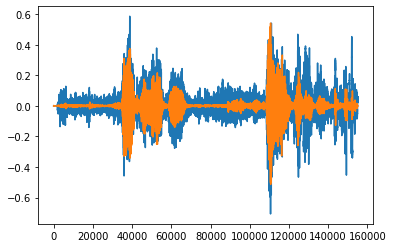

In [17]:
import matplotlib.pyplot as plt
plt.plot(data_normed)
plt.plot(audio)


In [12]:
audio[0]

0.0

In [13]:
import IPython.display as ipd

In [14]:
ipd.Audio(audio, rate=sampleRate)

In [15]:
ipd.Audio(data, rate=sampleRate)